# 이미지 불러오기

In [ ]:
!mkdir dataset
!mkdir dataset/dog
!mkdir dataset/cat

In [ ]:
import os 
import cv2

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

import pickle

In [ ]:
data_path = '/content/dataset/'
os.listdir(data_path)

['cat', 'dog']

In [ ]:
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(data_path):
    sub_path = '/content/dataset/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'cat': ['/content/dataset/cat/cat1.jpg',
  '/content/dataset/cat/cat3.jpg',
  '/content/dataset/cat/cat2.jpg'],
 'dog': ['/content/dataset/dog/dog2.jpg',
  '/content/dataset/dog/dog1.jpg',
  '/content/dataset/dog/dog3.jpg']}

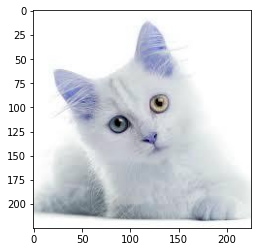

In [ ]:
plt.imshow(cv2.imread('/content/dataset/cat/cat1.jpg'))

In [ ]:
a = np.array([[0]])
a

array([[0]])

In [ ]:
np.array([a, a])

array([[[0]],

       [[0]]])

In [ ]:
x_datasets, y_datasets = [], []

label2index = {'cat' : 1, 'dog' : 0}

for label, filenames in dataset.items():
    for filename in filenames:
        # img를 array 형태로 변경
        image = cv2.imread(filename)
        resize = lambda x: tf.image.resize(x, (224, 224))
        image = resize(image)
        x_datasets.append(image)

        # label을 index로 변경
        y_datasets.append(label2index[label])
x_datasets, y_datasets

([<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
  array([[[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
  
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
  
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
  
         ...,
  
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
  
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 25

In [ ]:
x_datasets[1].shape

TensorShape([224, 224, 3])

In [ ]:
x_datasets = np.array(x_datasets)
x_datasets.shape

(6, 224, 224, 3)

In [ ]:
y_datasets = np.array(y_datasets)
y_datasets

array([1, 1, 1, 0, 0, 0])

In [ ]:
np.mean(x_datasets[0], axis=0)

array([[251.0172 , 251.55501, 251.59055],
       [250.7218 , 251.28612, 251.29532],
       [250.31018, 250.8572 , 250.9193 ],
       [249.82858, 250.40385, 250.45743],
       [249.37662, 250.07564, 250.14214],
       [248.86267, 249.62508, 249.68474],
       [248.33789, 249.19643, 249.32976],
       [248.00023, 248.88795, 249.02339],
       [246.83275, 247.81578, 248.01114],
       [246.38705, 247.39755, 247.5913 ],
       [245.66614, 246.81367, 247.067  ],
       [245.18236, 246.35208, 246.60814],
       [244.84883, 246.11574, 246.42142],
       [244.76237, 246.03487, 246.3256 ],
       [244.64389, 245.94615, 246.27098],
       [244.35445, 245.80576, 246.22926],
       [243.16028, 244.9053 , 245.70464],
       [242.63606, 244.63943, 245.4344 ],
       [242.27225, 244.27722, 245.10216],
       [240.97778, 243.14047, 243.80713],
       [239.5399 , 241.74556, 242.51775],
       [237.48093, 239.82948, 240.79395],
       [234.34793, 236.68571, 238.38548],
       [232.15904, 234.60326, 236.

In [ ]:
def zero_mean(image):
    # zero-centering
    return np.mean(image, axis=0)

In [ ]:
img_mean = zero_mean(train_img)

train_img -= img_mean
test_img -= img_mean

In [ ]:
def grayscale(image, grayscale=False):
    # grayscale
    if grayscale:
        image = tf.image.rgb_to_grayscale(image)
    return np.array(image)

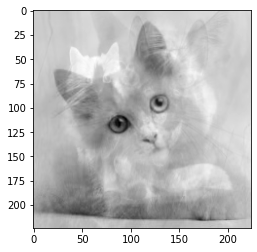

In [ ]:
plt.imshow(x_datasets[0][:,:,0], cmap='gray')
plt.show()

In [ ]:
with open('x_dataset.pickle', 'wb') as f:
    pickle.dump(x_datasets, f)

In [ ]:
with open('y_dataset.pickle', 'wb') as f:
    pickle.dump(y_datasets, f)